<a href="https://colab.research.google.com/github/Dhanushtg/Bank-Loan-Analysis-SQL/blob/main/House%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from matplotlib.cm import rainbow
from nbformat import read
from IPython.display import FileLink

In [ ]:
d= pd.read_csv("/content/ch_train1 (2).csv")

In [ ]:
df=d.drop(columns=["ocean_proximity"])

In [ ]:
df[df["total_bedrooms"].isna()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
290,-122.16,37.77,47,1256,NaN,570,218,4.3750,161900
341,-122.17,37.75,38,992,NaN,732,259,1.6196,85100
538,-122.28,37.78,29,5154,NaN,3741,1273,2.5762,173400
563,-122.24,37.75,45,891,NaN,384,146,4.9489,247100
696,-122.10,37.69,41,746,NaN,387,161,3.9063,178400
...,...,...,...,...,...,...,...,...,...
19932,-119.33,36.30,11,3045,NaN,1563,516,5.4337,133800
19959,-119.32,36.25,21,1231,NaN,609,206,2.8365,90000
20046,-119.01,36.06,25,1505,NaN,1392,359,1.6812,47700
20069,-120.37,38.01,30,473,NaN,242,93,2.5417,123200


In [ ]:
mean_bed=d['total_bedrooms'].mean()
df['total_bedrooms']=d['total_bedrooms'].fillna(value=mean_bed)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20135,-119.06,34.38,33,1465,262.0,731,266,3.9464,230300
20136,-119.06,34.37,32,3885,759.0,2504,736,3.6453,201700
20137,-119.05,34.36,22,1815,506.0,2428,473,2.8417,162500
20138,-119.05,34.40,50,1236,282.0,1079,257,2.6991,181300


In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred=rf.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print(r2_score)

0.8140945266935523


Feature importances:
1. median_income: 0.5192089813348574
2. longitude: 0.16069113668873264
3. latitude: 0.1504926008472162
4. housing_median_age: 0.065517477612575
5. population: 0.03397072158954549
6. total_bedrooms: 0.02526315091311792
7. total_rooms: 0.024203447368935545
8. households: 0.02065248364501988


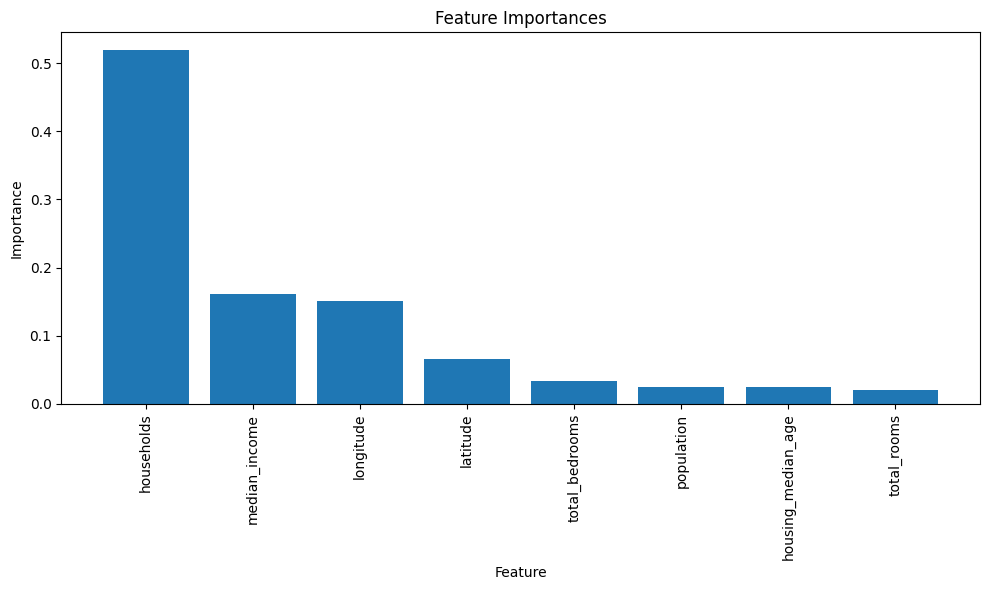

In [ ]:
feature_names=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
feature_importances = rf.feature_importances_
indices = np.argsort(feature_importances)[::-1]
print("Feature importances:")
for i, idx in enumerate(indices):
    if idx < len(x_train.columns):
        column_name = x_train.columns[idx]
        print(f"{i+1}. {column_name}: {feature_importances[idx]}")
    else:
        print(f"Index {idx} is out of bounds for axis 0 with size {len(X_train.columns)}")
X_new = x_train.iloc[:, indices]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(X_new.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(X_new.shape[1]), np.array(X_new.columns)[indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [ ]:
df


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20135,-119.06,34.38,33,1465,262.0,731,266,3.9464,230300
20136,-119.06,34.37,32,3885,759.0,2504,736,3.6453,201700
20137,-119.05,34.36,22,1815,506.0,2428,473,2.8417,162500
20138,-119.05,34.40,50,1236,282.0,1079,257,2.6991,181300


In [ ]:
x1=df.iloc[:,[0,1,6,7]]
y1=df.iloc[:,-1]

In [ ]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x,y,test_size=0.3, random_state= 1)

In [ ]:
rf1=RandomForestRegressor(max_depth=3,min_samples_leaf=10,random_state=2)
rf1.fit(x1_train,y1_train)
pred1=rf1.predict(x1_test)

In [ ]:
y_pred1=rf.predict(x_test)


In [ ]:
from sklearn.metrics import r2_score
r2_score = r2_score(y_test, y_pred)
print(r2_score)


0.8140945266935523
